In [82]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from datetime import datetime

In [104]:
df = pd.read_csv("train.csv")
df2 = pd.read_csv("test.csv")
df= df.drop(columns="Unnamed: 0")
df

,Policy_start_date,Age,Annual_premium,Vehicle_year,Claim_amount,Vehicle_risk_type,Area
0,2013-11-29,38,380.20,2013,0.0,2,0
1,2013-11-29,38,393.50,2013,0.0,2,0
2,2013-11-29,38,393.50,2013,0.0,2,0
3,2013-11-29,38,395.47,2013,0.0,2,0
4,2006-05-29,39,250.52,2006,0.0,2,0
...,...,...,...,...,...,...,...
97048,2018-07-30,37,263.79,2000,0.0,2,0
97049,2018-08-16,41,418.97,2013,0.0,2,0
97050,2018-11-21,44,571.91,1999,0.0,2,0
97051,2018-11-21,72,339.66,2004,0.0,1,0


In [103]:
df.loc[0, "Annual_premium"]
from datetime import datetime

date_str = "2014-01-01"
year = datetime.strptime(date_str, "%Y-%m-%d").year  # Extract the year
print(year)

2014


In [105]:

df_cleaned = df
for x in range(df_cleaned.shape[0]):
    date_str = df_cleaned.loc[x,"Policy_start_date"]
    year = datetime.strptime(date_str, "%Y-%m-%d").year
    df_cleaned.loc[x,"Policy_start_date"] = year
    age = int(df_cleaned.loc[x,"Age"])
    if age < 10:
        df_cleaned.loc[x, "Age"] = "<10"
    else:
        for start in range(10, 100, 10):
            if start <= age < start + 10:
                df_cleaned.loc[x, "Age"] = f"{start}-{start + 10}"
                break
        else:
            df_cleaned.loc[x, "Age"] = "90-100"
    ap = df_cleaned.loc[x,"Annual_premium"]
    #print(ap)
    if ap < 100:
        df_cleaned.loc[x, "Annual_premium"] = "ap<100"
    else:
        for start in range(100, 2000, 100):
            if start <= ap < start + 100:
                df_cleaned.loc[x, "Annual_premium"] = f"ap{start}-{start + 100}"
                break
        else:
            df_cleaned.loc[x, "Annual_premium"] = "ap1900-2000"
    claims = df_cleaned.loc[x,"Claim_amount"]
    if claims<1000:
        df_cleaned.loc[x,"Claim_amount"] = "<1000"
    elif claims < 5000:
        df_cleaned.loc[x,"Claim_amount"] = "1000<5000"
    elif claims < 10000:
        df_cleaned.loc[x,"Claim_amount"] = "5000<10000"
    elif claims < 50000:
        df_cleaned.loc[x,"Claim_amount"] = "10000<50000"
    else:
        df_cleaned.loc[x,"Claim_amount"] = "50000+"

/var/folders/0q/22f144kx4dn41cw151l589xh0000gn/T/ipykernel_85003/3361145437.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '30-40' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_cleaned.loc[x, "Age"] = f"{start}-{start + 10}"
/var/folders/0q/22f144kx4dn41cw151l589xh0000gn/T/ipykernel_85003/3361145437.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'ap300-400' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_cleaned.loc[x, "Annual_premium"] = f"ap{start}-{start + 100}"
/var/folders/0q/22f144kx4dn41cw151l589xh0000gn/T/ipykernel_85003/3361145437.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '<1000' has dtype incompatible with float64, please

In [96]:
df_cleaned["Claim_amount"].unique().max()

260853.24

In [106]:
import torch
import tensorflow as tf
import pandas as pd
import numpy as np
df = df_cleaned
col1 = ['Policy_start_date', 'Age', 'Annual_premium', 'Vehicle_year',
       'Claim_amount', 'Vehicle_risk_type', 'Area']
from collections import defaultdict#run once
data_whole = []
for x in range(df.shape[0]):#df.shape[0]):
    ls0=[]
    for k in col1:
        v = df.loc[x,k]
        #if(isinstance(v,str)):
        v=str(v)
        ls0.append(v)
    data_whole.append(ls0)
data_whole = np.array(data_whole)
ustring = np.unique(data_whole.flatten())
ustring.shape
dict = {string: idx for idx, string in enumerate(ustring)}
len(dict)
print(dict.get("10225.0"))
dict_id = {v: k for k, v in dict.items()}
print(dict_id.get(110))
print(len(dict))

None
None
98


In [114]:
num_heads = 8#run once
d_model = 512
ff_dim = 2048
batch_size, seq_len, d_model = 32, 50, 512
num_classes = 512
vocab_size = len(dict)
num_layers = 3
class transformer(torch.nn.Module):
    def __init__(self,vocab_size, d_model, num_heads, ff_dim, num_layers):
        super(transformer, self).__init__()
        self.embedding = torch.nn.Embedding(vocab_size, d_model)
        #self.positional_encoding = torch.nn.Parameter(torch.zeros(1, vocab_size, d_model))
        self.transf = torch.nn.Transformer(d_model, num_heads, num_layers, num_layers, ff_dim, batch_first=True)
        self.ffn = torch.nn.Linear(d_model, vocab_size) #torch.nn.Linear(ff_dim, d_model),
        # self.norm1 = torch.nn.LayerNorm(d_model)
        # self.norm2 = torch.nn.LayerNorm(d_model)
        #self.onedim = torch.nn.Linear(d_model)
        #self.softmax = torch.nn.Softmax()

    def forward(self, x):
        x = self.embedding(x) #+ self.positional_encoding[:, :x.size(1), :]
        output = self.transf(x, x)
        logits = self.ffn(output)
        return logits
    def pred(self,x):
        #embedded_vocab = self.embedding.weight
        #probabilities = torch.nn.functional.softmax(x.float(),dim=-1)
        return torch.argmax(x, dim=-1)
    def return_embed(self):
        return self.embedding.weight
tfm = transformer(vocab_size, d_model, num_heads, ff_dim, num_layers)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(tfm.parameters(), lr=1e-3)

In [116]:
total_rows = df_cleaned.shape[0]
import random
batch_size = 512
epochs = 0
for kv in range(4):
  ls_loss0 = []
  random.shuffle(col1)
  print(col1)
  for batch_start in range(0, total_rows, batch_size):
      batch_end = min(batch_start + batch_size, total_rows)
      str_ls = []
      for x in range(batch_start, batch_end):
          ls0 = []
          for col in col1:
            v = df.loc[x, col]
            v = str(v)
            ls0.append(v)
          str_ls.append(ls0)
      data_x = np.array(str_ls)
      print(f"Processing batch from row {batch_start} to {batch_end}: {data_x.shape}")

      x_train = []
      for row in str_ls:
          ls0 = []
          for item in row:
              ls0.append(dict.get(item, 0))
          x_train.append(ls0)

      x_train = torch.from_numpy(np.array(x_train))
      y_train = x_train[:, 1:]
      x_train = x_train[:, :-1]

      ls_loss = 0
      output = tfm(x_train)
      output = output.view(-1, output.size(-1))
      #print(output.shape)
      #print(y_train.shape)
      y_batch = y_train.reshape(-1)
      #print(y_batch.shape)
      loss = criterion(output,y_batch)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      ls_loss=loss.item()
      print("Epochs: ",epochs,"Loss: ",ls_loss)
      ls_loss0.append(ls_loss)
  epochs+=1
  print("loss mean: ", sum(ls_loss0) / len(ls_loss0))
  torch.save(tfm.state_dict(), "transformer_model_no_positional_1.pth")

['Annual_premium', 'Area', 'Age', 'Vehicle_year', 'Vehicle_risk_type', 'Claim_amount', 'Policy_start_date']
Processing batch from row 0 to 512: (512, 7)
Epochs:  0 Loss:  3.4826724529266357
Processing batch from row 512 to 1024: (512, 7)
Epochs:  0 Loss:  3.625688314437866
Processing batch from row 1024 to 1536: (512, 7)
Epochs:  0 Loss:  3.4156782627105713
Processing batch from row 1536 to 2048: (512, 7)
Epochs:  0 Loss:  3.345763921737671
Processing batch from row 2048 to 2560: (512, 7)
Epochs:  0 Loss:  3.3733081817626953
Processing batch from row 2560 to 3072: (512, 7)
Epochs:  0 Loss:  3.332897901535034
Processing batch from row 3072 to 3584: (512, 7)
Epochs:  0 Loss:  3.451181650161743
Processing batch from row 3584 to 4096: (512, 7)
Epochs:  0 Loss:  3.2608747482299805
Processing batch from row 4096 to 4608: (512, 7)
Epochs:  0 Loss:  3.1796200275421143
Processing batch from row 4608 to 5120: (512, 7)
Epochs:  0 Loss:  3.1496593952178955
Processing batch from row 5120 to 5632: (

Processing batch from row 0 to 512: (512, 7)
0
Processing batch from row 512 to 1024: (512, 7)
1
Processing batch from row 1024 to 1536: (512, 7)
2
Processing batch from row 1536 to 2048: (512, 7)
3
Processing batch from row 2048 to 2560: (512, 7)
4
Processing batch from row 2560 to 3072: (512, 7)
5
Processing batch from row 3072 to 3584: (512, 7)
6
Processing batch from row 3584 to 4096: (512, 7)
7
Processing batch from row 4096 to 4608: (512, 7)
8
Processing batch from row 4608 to 5120: (512, 7)
9
Processing batch from row 5120 to 5632: (512, 7)
10
Processing batch from row 5632 to 6144: (512, 7)
11
Processing batch from row 6144 to 6656: (512, 7)
12
Processing batch from row 6656 to 7168: (512, 7)
13
Processing batch from row 7168 to 7680: (512, 7)
14
Processing batch from row 7680 to 8192: (512, 7)
15
Processing batch from row 8192 to 8704: (512, 7)
16
Processing batch from row 8704 to 9216: (512, 7)
17
Processing batch from row 9216 to 9728: (512, 7)
18
Processing batch from row 9

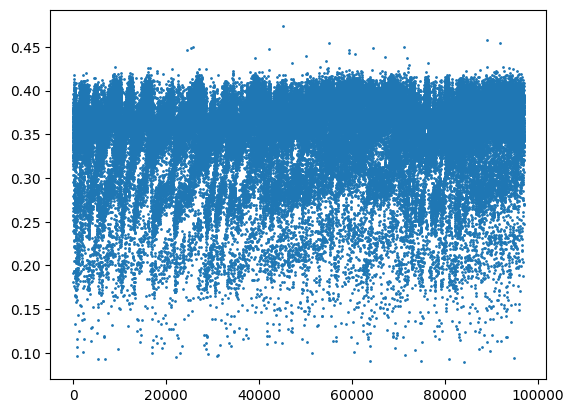

In [117]:
total_rows = df_cleaned.shape[0]
batch_size = 512
prob_ls = np.zeros(df.shape[0])
count_p = 0
import matplotlib.pyplot as plt
for batch_start in range(0, total_rows, batch_size):
      batch_end = min(batch_start + batch_size, total_rows)
      str_ls = []
      for x in range(batch_start, batch_end):
          ls0 = []
          for col in col1:
            v = df.loc[x, col]
            v = str(v)
            ls0.append(v)
          str_ls.append(ls0)
      data_x = np.array(str_ls)
      print(f"Processing batch from row {batch_start} to {batch_end}: {data_x.shape}")

      x_train = []
      for row in str_ls:
          ls0 = []
          for item in row:
              ls0.append(dict.get(item, 0))
          x_train.append(ls0)

      x_train = torch.from_numpy(np.array(x_train))
      y_train = x_train[:, 1:]
      x_train = x_train[:, :-1]
      prob_distri = torch.softmax(tfm(x_train[:,:]),dim=-1)
      prob_distri.shape
      for k in range(1,len(col1)-2):
        prob_distri = torch.softmax(tfm(x_train[:,0:k]),dim=-1)
        for x in range(prob_distri.shape[0]):
            prob0 = 0
            prob0=prob_distri[x,k-1,y_train[x,k-1]].item()
            prob_ls[batch_start + x]+=prob0
        #print(k)
      print(count_p)
      count_p += 1
plt.scatter(range(len(prob_ls)),prob_ls,s=1)
        #get minum prob index to locate least likely combination across data

print(np.argmin(prob_ls))
        #df.loc[294]

In [118]:

df_test = df2 

for x in range(df_test.shape[0]):
    date_str = df_test.loc[x, "Policy_start_date"]
    year = datetime.strptime(date_str, "%Y-%m-%d").year
    df_test.loc[x, "Policy_start_date"] = year

    age = int(df_test.loc[x, "Age"])
    if age < 10:
        df_test.loc[x, "Age"] = "<10"
    else:
        for start in range(10, 100, 10):
            if start <= age < start + 10:
                df_test.loc[x, "Age"] = f"{start}-{start + 10}"
                break
        else:
            df_test.loc[x, "Age"] = "90-100"

    ap = df_test.loc[x, "Annual_premium"]
    if ap < 100:
        df_test.loc[x, "Annual_premium"] = "ap<100"
    else:
        for start in range(100, 2000, 100):
            if start <= ap < start + 100:
                df_test.loc[x, "Annual_premium"] = f"ap{start}-{start + 100}"
                break
        else:
            df_test.loc[x, "Annual_premium"] = "ap1900-2000"

    claims = df_test.loc[x, "Claim_amount"]
    if claims < 1000:
        df_test.loc[x, "Claim_amount"] = "<1000"
    elif claims < 5000:
        df_test.loc[x, "Claim_amount"] = "1000<5000"
    elif claims < 10000:
        df_test.loc[x, "Claim_amount"] = "5000<10000"
    elif claims < 50000:
        df_test.loc[x, "Claim_amount"] = "10000<50000"
    else:
        df_test.loc[x, "Claim_amount"] = "50000+"


/var/folders/0q/22f144kx4dn41cw151l589xh0000gn/T/ipykernel_85003/2525734607.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '40-50' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_test.loc[x, "Age"] = f"{start}-{start + 10}"
/var/folders/0q/22f144kx4dn41cw151l589xh0000gn/T/ipykernel_85003/2525734607.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'ap1400-1500' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_test.loc[x, "Annual_premium"] = f"ap{start}-{start + 100}"
/var/folders/0q/22f144kx4dn41cw151l589xh0000gn/T/ipykernel_85003/2525734607.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '50000+' has dtype incompatible with int64, please expl

Processing batch from row 0 to 512: (512, 7)
0
Processing batch from row 512 to 1015: (503, 7)
1
496


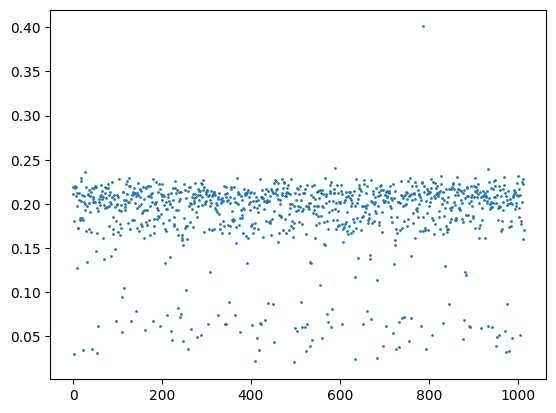

In [119]:
total_rows = df_test.shape[0]
batch_size = 512
prob_ls = np.zeros(df_test.shape[0])
count_p = 0
import matplotlib.pyplot as plt

for batch_start in range(0, total_rows, batch_size):
    batch_end = min(batch_start + batch_size, total_rows)
    str_ls = []
    for x in range(batch_start, batch_end):
        ls0 = []
        for col in col1:
            v = df_test.loc[x, col]
            v = str(v)
            ls0.append(v)
        str_ls.append(ls0)
    data_x = np.array(str_ls)
    print(f"Processing batch from row {batch_start} to {batch_end}: {data_x.shape}")

    x_train = []
    for row in str_ls:
        ls0 = []
        for item in row:
            ls0.append(dict.get(item, 0))
        x_train.append(ls0)

    x_train = torch.from_numpy(np.array(x_train))
    y_train = x_train[:, 1:]
    x_train = x_train[:, :-1]
    prob_distri = torch.softmax(tfm(x_train[:, :]), dim=-1)
    prob_distri.shape
    for k in range(1, len(col1) - 2):
        prob_distri = torch.softmax(tfm(x_train[:, 0:k]), dim=-1)
        for x in range(prob_distri.shape[0]):
            prob0 = 0
            prob0 = prob_distri[x, k - 1, y_train[x, k - 1]].item()
            prob_ls[batch_start + x] += prob0
        # print(k)
    print(count_p)
    count_p += 1

plt.scatter(range(len(prob_ls)), prob_ls, s=1)
# Get minimum probability index to locate the least likely combination across data
print(np.argmin(prob_ls))


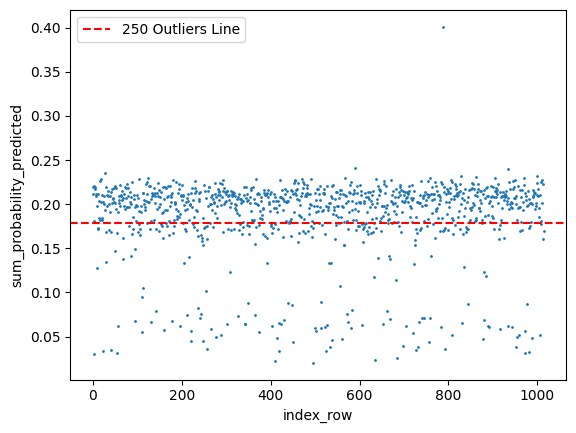

In [125]:
plt.scatter(range(len(prob_ls)),prob_ls,s=1)
plt.xlabel("index_row")
plt.ylabel("sum_probability_predicted")
plt.axhline(y=0.1783, color='r', linestyle='--', label='250 Outliers Line')
#plt.axhline(y=0.75, color='black', linestyle='--', label='500 Outliers Line')
plt.legend()
plt.show()

In [120]:
sorted(prob_ls)[250]

0.17839848027506378

In [123]:
df2["prob_transformer"] = prob_ls
df2["is_fraud"] = 0
for x in range(df2.shape[0]):
    if df2.loc[x,"prob_transformer"]<0.178:
        df2.loc[x,"is_fraud"] = "Y"
    else:
        df2.loc[x,"is_fraud"] = "N"

/var/folders/0q/22f144kx4dn41cw151l589xh0000gn/T/ipykernel_85003/1343366407.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'N' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df2.loc[x,"is_fraud"] = "N"


In [143]:
df2[(df2["fraud_reported"] == "N") & (df2["is_fraud"] == "N")]


,Unnamed: 0,Policy_start_date,Age,Annual_premium,Vehicle_year,Claim_amount,Vehicle_risk_type,Area,fraud_reported,prob_transformer,is_fraud
4,5,2014,40-50,ap1500-1600,2009,5000<10000,2,1.0,N,0.220517,N
6,7,2000,30-40,ap1300-1400,2012,50000+,2,1.0,N,0.219268,N
7,8,1990,30-40,ap1100-1200,2015,50000+,2,1.0,N,0.209343,N
8,9,1997,30-40,ap1400-1500,2012,10000<50000,2,0.0,N,0.211765,N
9,10,2011,40-50,ap1300-1400,1996,10000<50000,2,1.0,N,0.197977,N
...,...,...,...,...,...,...,...,...,...,...,...
1008,1009,2001,20-30,ap1200-1300,2012,50000+,2,1.0,N,0.180926,N
1009,1010,2007,30-40,ap1300-1400,1996,5000<10000,2,0.0,N,0.225009,N
1010,1011,1991,30-40,ap1300-1400,2006,50000+,2,0.0,N,0.201497,N
1011,1012,2014,40-50,ap1400-1500,2015,50000+,2,0.0,N,0.227688,N


In [124]:
correct = 0
for x in range(df2.shape[0]):
    if df2.loc[x,"fraud_reported"] == df2.loc[x,"is_fraud"]:
        correct+=1
print("accuracy: ", correct/df2.shape[0])

accuracy:  0.6571428571428571


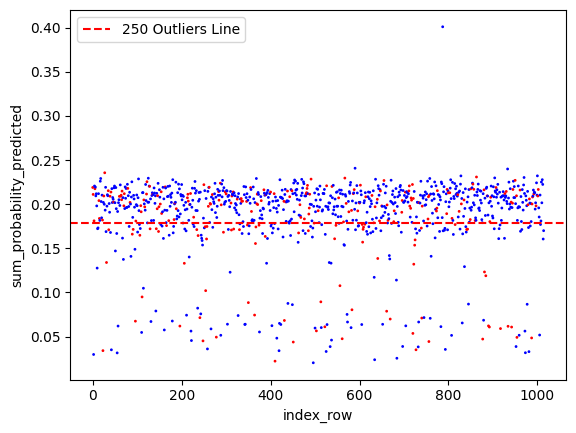

In [131]:
plt.scatter(range(len(prob_ls)),df2["prob_transformer"],s=1,c=df2["fraud_reported"].map({"Y": 'red', "N": 'blue'}))
plt.xlabel("index_row")
plt.ylabel("sum_probability_predicted")
plt.axhline(y=0.1783, color='r', linestyle='--', label='250 Outliers Line')
#plt.axhline(y=0.75, color='black', linestyle='--', label='500 Outliers Line')
plt.legend()
plt.show()

In [122]:
df2

,Unnamed: 0,Policy_start_date,Age,Annual_premium,Vehicle_year,Claim_amount,Vehicle_risk_type,Area,fraud_reported,prob_transformer,is_fraud
0,1,2014,40-50,ap1400-1500,2004,50000+,2,1.0,Y,0.218869,F
1,2,2006,40-50,ap1100-1200,2007,5000<10000,2,1.0,Y,0.210992,F
2,3,2000,20-30,ap1400-1500,2007,10000<50000,3,1.0,N,0.029678,T
3,4,1990,40-50,ap1400-1500,2014,50000+,2,1.0,Y,0.181069,F
4,5,2014,40-50,ap1500-1600,2009,5000<10000,2,1.0,N,0.220517,F
...,...,...,...,...,...,...,...,...,...,...,...
1010,1011,1991,30-40,ap1300-1400,2006,50000+,2,0.0,N,0.201497,F
1011,1012,2014,40-50,ap1400-1500,2015,50000+,2,0.0,N,0.227688,F
1012,1013,2003,30-40,ap1300-1400,1996,50000+,2,0.0,N,0.222334,F
1013,1014,2011,60-70,ap1300-1400,1998,10000<50000,2,1.0,N,0.160460,T
